In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns1

In [26]:
wine_data=pd.read_csv('Datasets/winequalityN.csv')

In [27]:
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [28]:
wine_data.shape

(6497, 13)

In [29]:
wine_data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [30]:
def fill_null_with_mean(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
    return df

In [31]:
fill_null_with_mean(wine_data)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [32]:
wine_data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [33]:
unique_classes=wine_data['type'].unique()
unique_classes

array(['white', 'red'], dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
def label_encoding(df,column_name):
    le=LabelEncoder()
    df[column_name]=le.fit_transform(df[column_name])
    return df

In [36]:
wine_data=label_encoding(wine_data,'type')

In [37]:
wine_data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [38]:
unique_classes=wine_data['type'].unique()
unique_classes

array([1, 0])

In [48]:
def separate_target_independent(df,target):
    independent_columns=[col for col in df.columns if col!=target]
    target=df[target]
    independent=df[independent_columns]
    return target,independent

In [49]:
target,independent=separate_target_independent(wine_data,'quality')

In [51]:
independent

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2


<Figure size 1200x800 with 0 Axes>

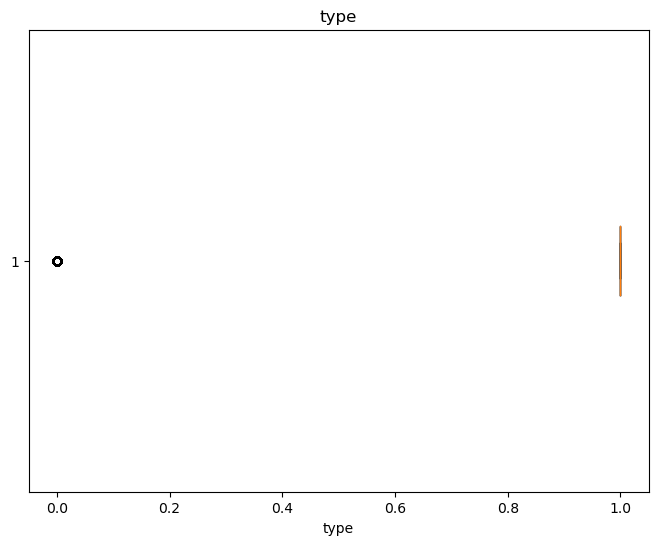

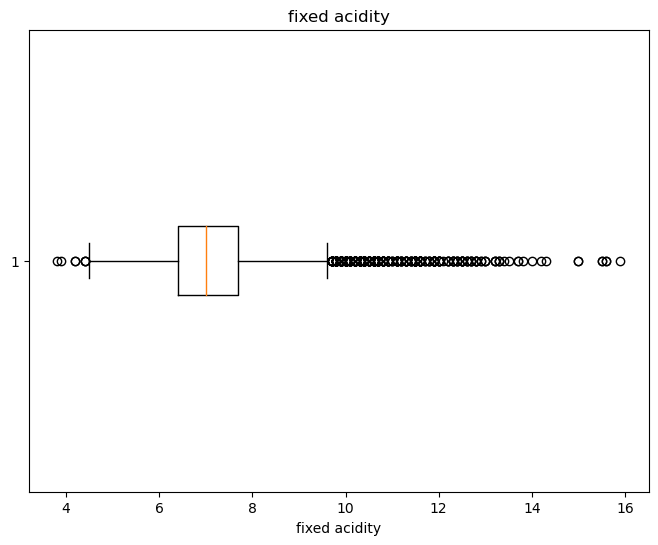

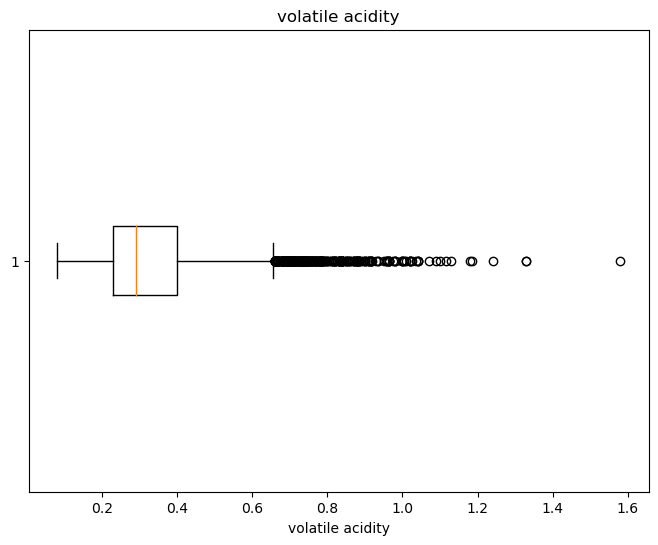

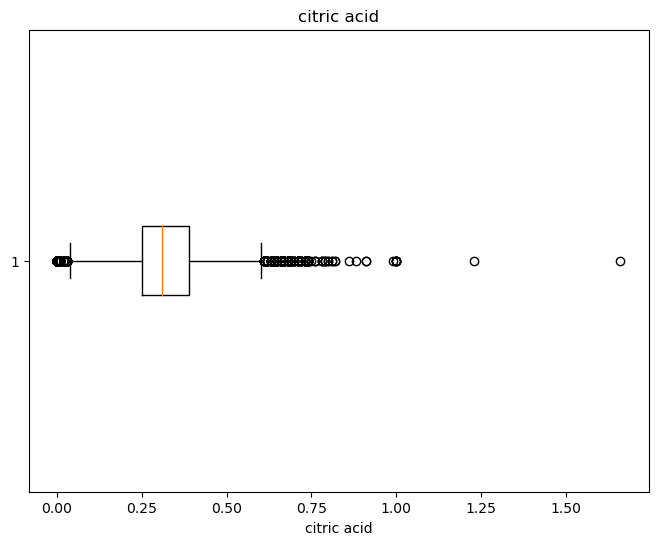

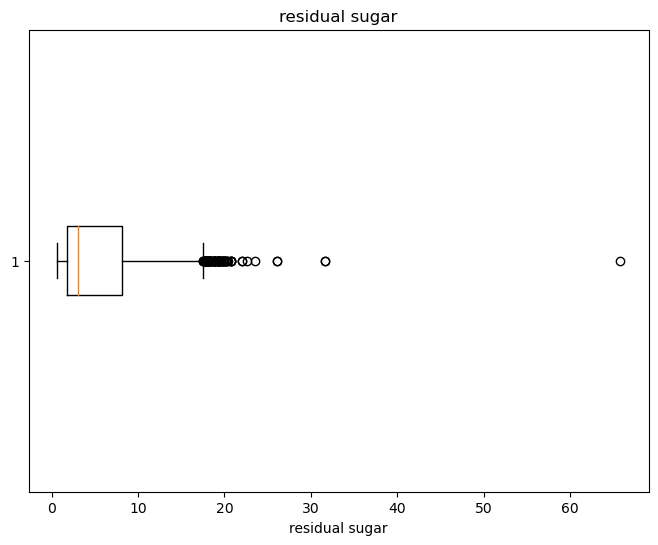

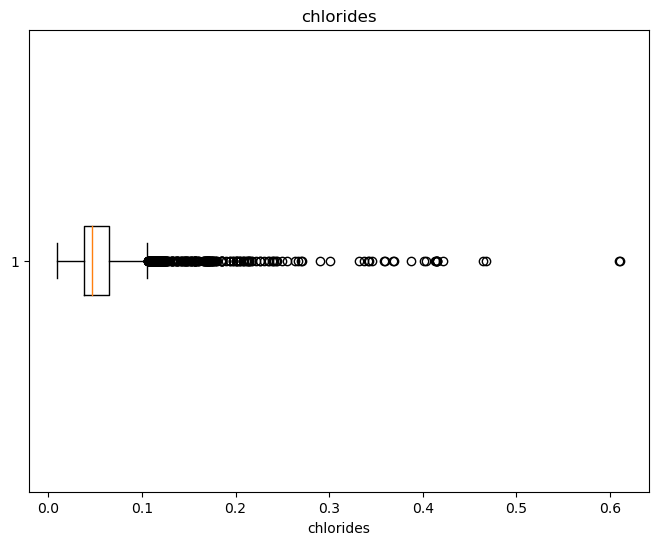

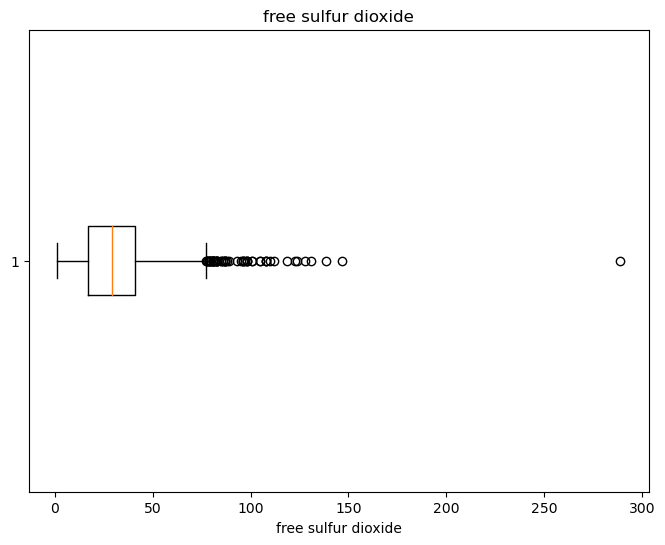

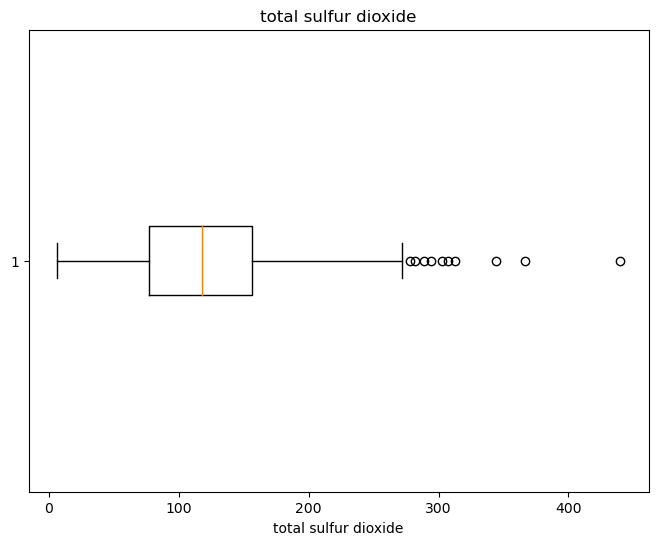

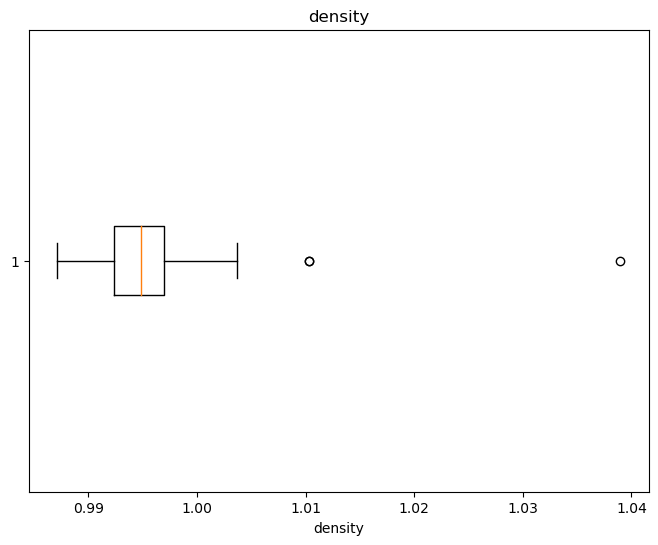

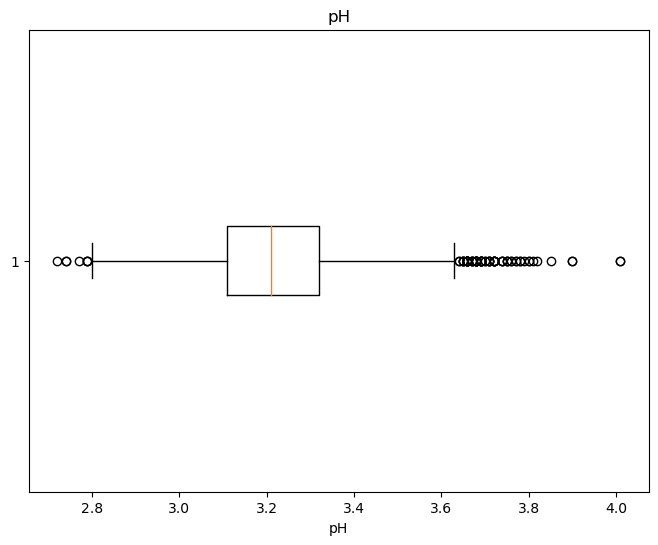

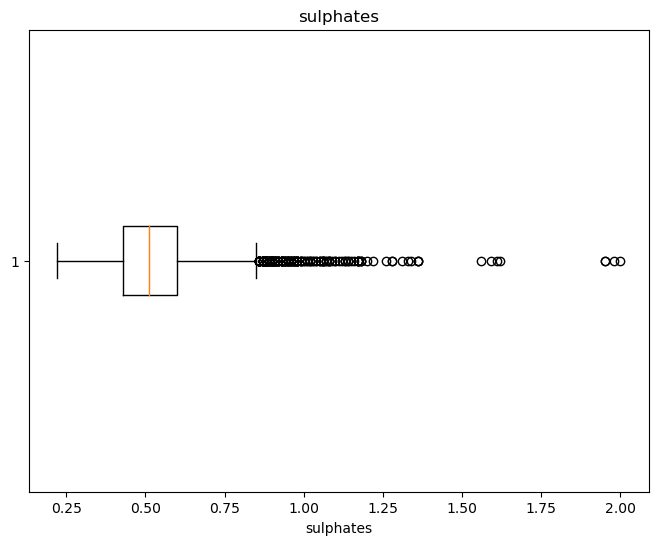

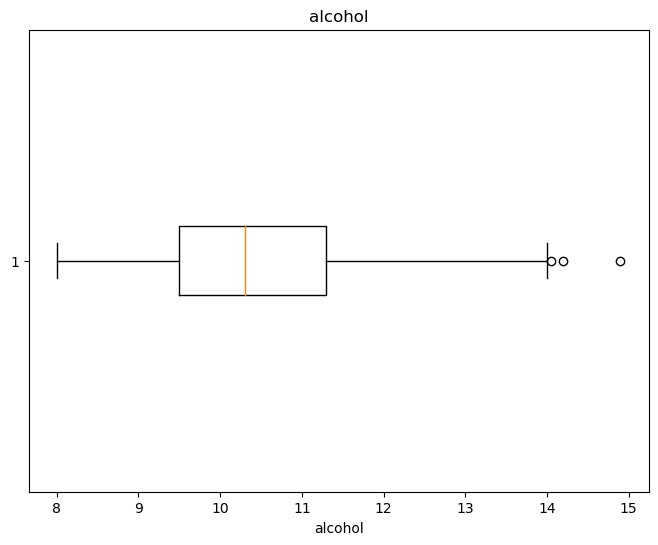

In [53]:
plt.figure(figsize=(12,8))

for column in independent.columns:
    plt.figure(figsize=(8,6))
    plt.title(f'{column}')
    plt.boxplot(independent[column],vert=False)
    plt.xlabel(column)
    plt.show()

In [55]:
selected_columns=['fixed acidity','volatile acidity','citric acid','chlorides','free sulfur dioxide','sulphates']

In [56]:
temp_df=independent[selected_columns].copy()

In [62]:
def fix_outliers(data,columns):
    for col in columns:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR=Q3-Q1
        data=data[(data[col]>=Q1-1.5*IQR)&(data[col]<=Q3+1.5*IQR)]
    return data    

In [63]:
wine_data=fix_outliers(wine_data,selected_columns)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


C:\Users\SAYAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fixed acidity'>

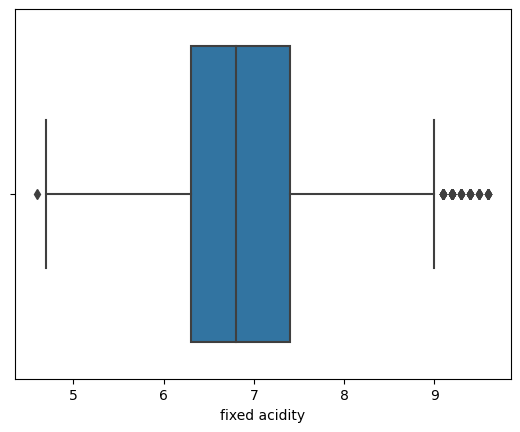

In [66]:
sns.boxplot(wine_data['fixed acidity'])

In [67]:
pd.DataFrame(wine_data.corr().round(2))

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.00,-0.23,-0.46,0.14,0.22,-0.58,0.30,0.49,-0.18,-0.28,-0.33,-0.00,0.06
fixed acidity,-0.23,1.00,0.07,0.26,0.00,0.21,-0.12,-0.06,0.27,-0.32,0.06,-0.10,-0.09
volatile acidity,-0.46,0.07,1.00,-0.23,-0.05,0.28,-0.20,-0.14,0.09,0.11,0.11,0.05,-0.17
citric acid,0.14,0.26,-0.23,1.00,0.06,-0.07,0.11,0.14,0.05,-0.16,0.02,0.02,0.04
residual sugar,0.22,0.00,-0.05,0.06,1.00,0.08,0.38,0.45,0.75,-0.24,-0.11,-0.44,-0.08
chlorides,-0.58,0.21,0.28,-0.07,0.08,1.00,-0.04,-0.03,0.50,0.16,0.24,-0.44,-0.27
free sulfur dioxide,0.30,-0.12,-0.20,0.11,0.38,-0.04,1.00,0.66,0.25,-0.08,-0.04,-0.24,0.04
total sulfur dioxide,0.49,-0.06,-0.14,0.14,0.45,-0.03,0.66,1.00,0.37,-0.13,-0.06,-0.39,-0.13
density,-0.18,0.27,0.09,0.05,0.75,0.50,0.25,0.37,1.00,-0.01,0.13,-0.79,-0.31
pH,-0.28,-0.32,0.11,-0.16,-0.24,0.16,-0.08,-0.13,-0.01,1.00,0.25,0.08,0.05


In [68]:
x=wine_data[['alcohol','type']]
y=wine_data['quality']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lgr=LinearRegression()

In [76]:
lgr.fit(x_train,y_train)

LinearRegression()

In [79]:
prediction=[[10.9,1]]

In [81]:
predicted=lgr.predict(prediction)
predicted

C:\Users\SAYAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.03609754])

In [82]:
y_pred=lgr.predict(x_test)

In [84]:
from sklearn.metrics import mean_squared_error

In [85]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.7731261749276981

In [86]:
from sklearn.metrics import r2_score

In [87]:
r2_score(y_test,y_pred)

0.17324844049422905